In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [140]:
df= pd.read_excel('after_EDA_final_dd.xlsx')

In [141]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS  ... DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0                   A  ...              0.0  -67.06  80.0  26.083333   
1                   A  ...              0.0   13.70  63.0  26.000000   
2                   A  ...              0.0  812.40  61.0  26.000000   
3                   A  ...              0.0  128.78  56.0  25.916667   
4                   A  ...              0.0 -100.63  60.0  25.916667   

  CUSTOMER_DEBIT_ACC CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                  3                       0.00                    0   
1                  0                       0.00                    0   
2                  1                   47205.46                    0   
3                  1                  170194.41                    0   
4                  1                   37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0              15.657527  3713.374413  
2                          0.0               5.319444     9.591558  
3                          0.0              49.102532    95.901806  
4                          0.0              18.551333    66.104647  

[5 rows x 39 columns]

In [142]:
df.shape

(24875, 39)

In [143]:
pd.set_option('display.max_rows', None)

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
df = df[df['CR_CARD_OVERDUE_STATUS'] == 'G']

In [146]:
df.shape

(22896, 39)

In [147]:
df_selected = df[['STR_CR_CARD_NUM', 'AVG_LIMIT_UTILIZATION','AGE', 'PAYMENT_AVG', 'CC_AGE','CUSTOMER_PROFITABILITY'
    
                ]]

In [148]:
df_selected.head()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233  80.0     8.008889  26.083333   
1  4157380000060029              15.657527  63.0  3713.374413  26.000000   
2  4157380000066018               5.319444  61.0     9.591558  26.000000   
3  4157380000072008              49.102532  56.0    95.901806  25.916667   
4  4157380000089002              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  
0                  -67.06  
1                   13.70  
2                  812.40  
3                  148.78  
4                  249.37

In [149]:
df_selected.shape

(22896, 6)

In [150]:
# Assuming 'df_selected' is your DataFrame
df_new = df_selected.drop(columns=['STR_CR_CARD_NUM'],axis=1)
df_new.head()

AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  CUSTOMER_PROFITABILITY
0               8.782233  80.0     8.008889  26.083333                  -67.06
1              15.657527  63.0  3713.374413  26.000000                   13.70
2               5.319444  61.0     9.591558  26.000000                  812.40
3              49.102532  56.0    95.901806  25.916667                  148.78
4              18.551333  60.0    66.104647  25.916667                  249.37

In [151]:
df_new.shape

(22896, 5)

In [152]:
df_new.dtypes

AVG_LIMIT_UTILIZATION     float64
AGE                       float64
PAYMENT_AVG               float64
CC_AGE                    float64
CUSTOMER_PROFITABILITY    float64
dtype: object

In [153]:
df_new.isna().sum()

AVG_LIMIT_UTILIZATION     0
AGE                       0
PAYMENT_AVG               0
CC_AGE                    0
CUSTOMER_PROFITABILITY    0
dtype: int64

In [154]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(df_new))

In [155]:
X1 = np.asarray(X)

In [156]:
##https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

In [157]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X1)
distances, indices = nbrs.kneighbors(X1)

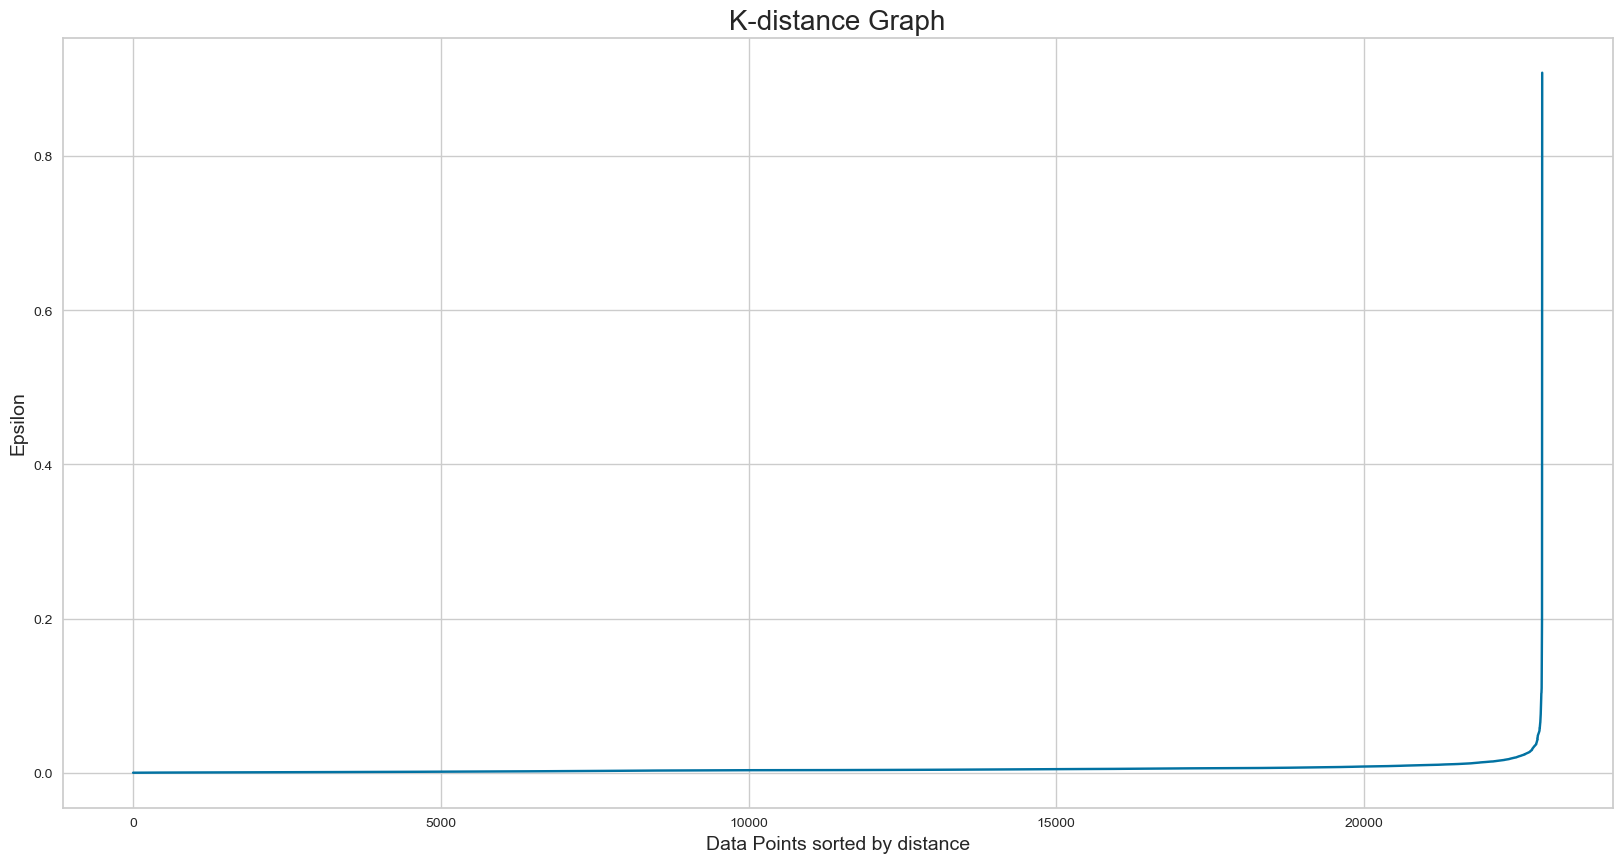

In [158]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [165]:
dbscan = DBSCAN(eps=0.07, min_samples=6)
clusters = dbscan.fit_predict(X)

# Get cluster labels
cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 57


In [167]:
unique_clusters, counts = np. unique(clusters,return_counts=True)
unique_clusters, counts 
for cluster, count in zip(unique_clusters,counts):
    print(f"Cluster{cluster}:{count}points")  

Cluster-1:57points
Cluster0:22833points
Cluster1:6points


In [164]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Assuming cluster_labels contains the assigned cluster labels
# and X is your feature matrix (DataFrame or ndarray)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X1, cluster_labels)

# Silhouette Score
silhouette_avg = silhouette_score(X1, cluster_labels)

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X1, cluster_labels)

print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz_index)


Davies-Bouldin Index: 1.4453820501661974
Silhouette Score: 0.6294836569546924
Calinski-Harabasz Index: 247.433373248242
